<a href="https://colab.research.google.com/github/JakeOh/202105_itw_bd26/blob/main/lab_da/da16_datetime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python `datetime` 모듈

* `datetime` 클래스: 날짜(date), 시간(time)과 관련된 정보들을 저장, 표현할 수 있는 기능(메서드)들을 가지고 있는 데이터 타입.
* https://docs.python.org/3/library/datetime.html 참고


In [1]:
import datetime  # datetime 모듈을 import

In [2]:
datetime.datetime.now()  #> Colab 가상 머신의 현재 시간을 리턴함.
# datetime 모듈에 있는 datetime 클래스에 있는 now() 메서드 호출

datetime.datetime(2021, 8, 19, 0, 42, 42, 426655)

In [3]:
from datetime import datetime  # datetime 모듈에서 datetime 클래스를 import

In [4]:
datetime.now()
# datetime 클래스의 now() 메서드 호출

datetime.datetime(2021, 8, 19, 0, 42, 42, 455469)


* `datetime` 클래스의 메서드


In [5]:
# datetime.now(): 코드가 실행되는 컴퓨터 OS에서 설정된 시간대의 현재 시간을 리턴
curr_dt = datetime.now()

In [6]:
curr_dt  # expression을 출력

datetime.datetime(2021, 8, 19, 0, 42, 42, 471568)

In [7]:
print(curr_dt)  # statement

2021-08-19 00:42:42.471568



* UTC(Coordinates Universal Timezone): 그리니치 천문대 기준 시간
* KST(Korean Standard Timezone): 한국표준시. UTC+09:00


In [8]:
# datetime.datetime 클래스의 속성들: year, month, day, hour, minute, second, ...
print(type(curr_dt))
print(curr_dt.year)
print(curr_dt.month)
print(curr_dt.day)
print(f'{curr_dt.hour}:{curr_dt.minute}:{curr_dt.second}')

<class 'datetime.datetime'>
2021
8
19
0:42:42


In [9]:
# datetime.datetime() 생성자 함수
yesterday = datetime(2021, 8, 17)
print(yesterday)

2021-08-17 00:00:00


In [10]:
tomorrow = datetime(2021, 8, 19, 17, 20)
print(tomorrow)

2021-08-19 17:20:00


In [11]:
tomorrow - yesterday  # datetime 타입의 변수들의 뺄셈 결과는 timedelta 클래스 타입

datetime.timedelta(days=2, seconds=62400)


* `datetime`(날짜/시간) 객체 <---> `str`(문자열) 객체
    * `datetime.strftime(포맷문자열)`: `datetime` 객체를 포맷문자열 형식으로 formatting된 문자열로 변환해서 리턴.
    * `datetime.strptime(문자열, 포맷문자열)`: 문자열(str)을 `datetime` 객체로 변환(parsing).

* 날짜 포맷 문자열
    * 연(year): `%Y`(4자리 연도), `%y`(2자리 연도)
    * 월(month): `%m`(2자리 숫자), `%B`(월 이름), `%b`(월 이름 약자)
    * 일(day): `%d`(2자리 숫자)
    * 시(hour): `%H`(24시간 형식. 0 ~ 23), `%I`(12시간 형식. 1 ~ 12)
    * 분(minute): `%M`(2자리 숫자. 00 ~ 59)
    * 초(second): `%S`(2자리 숫자. 00 ~ 59)


In [12]:
curr_dt = datetime.now()
print(curr_dt)

2021-08-19 00:42:42.581514


`datetime` 객체 ---> `str`

In [13]:
curr_dt.strftime('%Y/%m/%d')  #> argument로 전달된 포맷으로 formatting된 문자열을 리턴.

'2021/08/19'

In [14]:
curr_dt.strftime('%b-%d-%y')

'Aug-19-21'

In [15]:
curr_dt.strftime('%I:%M:%S %p')  # %p: AM/PM(오전/오후) 표시

'12:42:42 AM'

`str` ---> `datetime` 객체

In [16]:
# datetime.strptime(string, format): format 형식의 문자열 string을 datetime 객체로 변환(parsing) 리턴.
datetime.strptime('2021-08-18 18:04:30', '%Y-%m-%d %H:%M:%S')

datetime.datetime(2021, 8, 18, 18, 4, 30)

In [17]:
datetime.strptime('08-18-21', '%m-%d-%y')

datetime.datetime(2021, 8, 18, 0, 0)

In [18]:
datetime.strptime('18-08-21', '%y-%m-%d')  # 우리나라 방식(년-월-일)

datetime.datetime(2018, 8, 21, 0, 0)

In [19]:
datetime.strptime('18-08-21', '%d-%m-%y')  # 영국 방식(일-월-년)

datetime.datetime(2021, 8, 18, 0, 0)

* timestamp(UNIX time, POSIX time, epoch time, ...): 1970년 1월 1일 0시 0분 0초를 시작으로 해서 1초마다 1씩 증가하는 숫자.
* `datetime.timestamp` 메서드: `datetime` 객체 ---> `timestamp`(숫자)
* `datetime.fromtimestamp` 메서드: `timestamp`(숫자) ---> `datetime` 객체

In [20]:
curr_dt = datetime.now()
print(curr_dt)

2021-08-19 00:54:40.563941


In [21]:
ts = curr_dt.timestamp()
print(ts)
print(type(ts))

1629334480.563941
<class 'float'>


In [22]:
dt = datetime.fromtimestamp(1629334480)
print(dt)
print(type(dt))

2021-08-19 00:54:40
<class 'datetime.datetime'>


# pandas.to_datetime

## movies 데이터프레임

In [23]:
ratings_file = 'https://github.com/wesm/pydata-book/raw/2nd-edition/datasets/movielens/ratings.dat'

In [24]:
import pandas as pd

In [25]:
ratings = pd.read_csv(ratings_file, sep='::', engine='python',
                      names=['user_id', 'movie_id', 'rating', 'ts'],
                      nrows=10)  # 파일에서 10개 행만 읽음

In [26]:
ratings

,user_id,movie_id,rating,ts
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
5,1,1197,3,978302268
6,1,1287,5,978302039
7,1,2804,5,978300719
8,1,594,4,978302268
9,1,919,4,978301368


In [34]:
dates = []  # ratings 데이터프레임의 ts 값(timestamp)을 datetime 객체로 변환한 값들을 저장하기 위한 리스트
for ts in ratings['ts']:  # ts 컬럼의 값들을 처음부터 끝까지 반복하면서
    dates.append(datetime.fromtimestamp(ts))  # 숫자를 datetime으로 변환 후 리스트에 추가

print(dates)
print(pd.Series(dates))

# dates에 저장된 값들을 파생변수로 데이터프레임에 추가
ratings['dt'] = pd.Series(dates)

[datetime.datetime(2000, 12, 31, 22, 12, 40), datetime.datetime(2000, 12, 31, 22, 35, 9), datetime.datetime(2000, 12, 31, 22, 32, 48), datetime.datetime(2000, 12, 31, 22, 4, 35), datetime.datetime(2001, 1, 6, 23, 38, 11), datetime.datetime(2000, 12, 31, 22, 37, 48), datetime.datetime(2000, 12, 31, 22, 33, 59), datetime.datetime(2000, 12, 31, 22, 11, 59), datetime.datetime(2000, 12, 31, 22, 37, 48), datetime.datetime(2000, 12, 31, 22, 22, 48)]
0   2000-12-31 22:12:40
1   2000-12-31 22:35:09
2   2000-12-31 22:32:48
3   2000-12-31 22:04:35
4   2001-01-06 23:38:11
5   2000-12-31 22:37:48
6   2000-12-31 22:33:59
7   2000-12-31 22:11:59
8   2000-12-31 22:37:48
9   2000-12-31 22:22:48
dtype: datetime64[ns]


In [32]:
ratings

,user_id,movie_id,rating,ts,dt
0,1,1193,5,978300760,2000-12-31 22:12:40
1,1,661,3,978302109,2000-12-31 22:35:09
2,1,914,3,978301968,2000-12-31 22:32:48
3,1,3408,4,978300275,2000-12-31 22:04:35
4,1,2355,5,978824291,2001-01-06 23:38:11
5,1,1197,3,978302268,2000-12-31 22:37:48
6,1,1287,5,978302039,2000-12-31 22:33:59
7,1,2804,5,978300719,2000-12-31 22:11:59
8,1,594,4,978302268,2000-12-31 22:37:48
9,1,919,4,978301368,2000-12-31 22:22:48


In [35]:
# pd.to_datetime() 함수: 문자열 Series 또는 숫자 Series를 datetime Series로 변환
ratings['dt2'] = pd.to_datetime(ratings['ts'], unit='s')
#> unit: timestamp(숫자)가 저장하고 있는 시간의 단위
# s: 초(second), ms: milli-second, us: micro-second, ns: nano-second
ratings

,user_id,movie_id,rating,ts,dt,dt2
0,1,1193,5,978300760,2000-12-31 22:12:40,2000-12-31 22:12:40
1,1,661,3,978302109,2000-12-31 22:35:09,2000-12-31 22:35:09
2,1,914,3,978301968,2000-12-31 22:32:48,2000-12-31 22:32:48
3,1,3408,4,978300275,2000-12-31 22:04:35,2000-12-31 22:04:35
4,1,2355,5,978824291,2001-01-06 23:38:11,2001-01-06 23:38:11
5,1,1197,3,978302268,2000-12-31 22:37:48,2000-12-31 22:37:48
6,1,1287,5,978302039,2000-12-31 22:33:59,2000-12-31 22:33:59
7,1,2804,5,978300719,2000-12-31 22:11:59,2000-12-31 22:11:59
8,1,594,4,978302268,2000-12-31 22:37:48,2000-12-31 22:37:48
9,1,919,4,978301368,2000-12-31 22:22:48,2000-12-31 22:22:48


# resample

## SPX 데이터프레임

CSV 파일 날짜/시간 처리

In [36]:
file_path = 'https://github.com/wesm/pydata-book/raw/2nd-edition/examples/spx.csv'

In [37]:
df = pd.read_csv(file_path)

In [38]:
df.head()

,Date,SPX
0,1990-02-01 00:00:00,328.79
1,1990-02-02 00:00:00,330.92
2,1990-02-05 00:00:00,331.85
3,1990-02-06 00:00:00,329.66
4,1990-02-07 00:00:00,333.75


In [39]:
df.tail()

,Date,SPX
5467,2011-10-10 00:00:00,1194.89
5468,2011-10-11 00:00:00,1195.54
5469,2011-10-12 00:00:00,1207.25
5470,2011-10-13 00:00:00,1203.66
5471,2011-10-14 00:00:00,1224.58


데이터프레임의 Date 컬럼의 데이터 타입?

In [40]:
df.info()  #> Date 컬럼의 데이터 타입은 object -> 문자열(str)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5472 entries, 0 to 5471
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    5472 non-null   object 
 1   SPX     5472 non-null   float64
dtypes: float64(1), object(1)
memory usage: 85.6+ KB


In [41]:
# 연도별 주식 가격의 평균, 최소, 최대
df['year'] = df['Date'].str[:4].astype('int')

In [42]:
df

,Date,SPX,year
0,1990-02-01 00:00:00,328.79,1990
1,1990-02-02 00:00:00,330.92,1990
2,1990-02-05 00:00:00,331.85,1990
3,1990-02-06 00:00:00,329.66,1990
4,1990-02-07 00:00:00,333.75,1990
...,...,...,...
5467,2011-10-10 00:00:00,1194.89,2011
5468,2011-10-11 00:00:00,1195.54,2011
5469,2011-10-12 00:00:00,1207.25,2011
5470,2011-10-13 00:00:00,1203.66,2011


In [43]:
df.groupby('year')['SPX'].agg(['mean', 'min', 'max'])

,mean,min,max
year,,,
1990,334.123506,295.46,368.95
1991,376.186324,311.49,417.09
1992,415.747008,394.50,441.28
1993,451.614822,429.05,470.94
1994,460.416508,438.92,482.00
1995,541.719087,459.11,621.69
1996,670.494843,598.48,757.03
1997,873.427787,737.01,983.79
1998,1085.503254,927.69,1241.81


Date 컬럼의 타입이 문자열인 경우, 주기별(연도별, 분기별, 월별, ...) 통계를 계산하기 위해서는 문자열을 parsing해서 파생변수를 추가하고 groupby 계산을 해야 함.
Date 컬럼의 타입이 datetime인 경우, 그런 계산들을 간단히 수행할 수 있음.

In [45]:
df['dt'] = pd.to_datetime(df['Date'])

In [46]:
df

,Date,SPX,year,dt
0,1990-02-01 00:00:00,328.79,1990,1990-02-01
1,1990-02-02 00:00:00,330.92,1990,1990-02-02
2,1990-02-05 00:00:00,331.85,1990,1990-02-05
3,1990-02-06 00:00:00,329.66,1990,1990-02-06
4,1990-02-07 00:00:00,333.75,1990,1990-02-07
...,...,...,...,...
5467,2011-10-10 00:00:00,1194.89,2011,2011-10-10
5468,2011-10-11 00:00:00,1195.54,2011,2011-10-11
5469,2011-10-12 00:00:00,1207.25,2011,2011-10-12
5470,2011-10-13 00:00:00,1203.66,2011,2011-10-13


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5472 entries, 0 to 5471
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    5472 non-null   object        
 1   SPX     5472 non-null   float64       
 2   year    5472 non-null   int64         
 3   dt      5472 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 171.1+ KB


In [48]:
# 새로 추가된 dt 컬럼을 index로 변환
df = df.set_index('dt')

In [49]:
df.head()

,Date,SPX,year
dt,,,
1990-02-01,1990-02-01 00:00:00,328.79,1990
1990-02-02,1990-02-02 00:00:00,330.92,1990
1990-02-05,1990-02-05 00:00:00,331.85,1990
1990-02-06,1990-02-06 00:00:00,329.66,1990
1990-02-07,1990-02-07 00:00:00,333.75,1990


In [52]:
# df에서 datetime 타입의 인덱스를 사용해서 연도별 SPX 컬럼의 평균, 최솟값, 최댓값을 계산
df.resample('Y')['SPX'].agg(['mean', 'min', 'max'])

,mean,min,max
dt,,,
1990-12-31,334.123506,295.46,368.95
1991-12-31,376.186324,311.49,417.09
1992-12-31,415.747008,394.50,441.28
1993-12-31,451.614822,429.05,470.94
1994-12-31,460.416508,438.92,482.00
1995-12-31,541.719087,459.11,621.69
1996-12-31,670.494843,598.48,757.03
1997-12-31,873.427787,737.01,983.79
1998-12-31,1085.503254,927.69,1241.81


In [53]:
# 분기(Quarter)별 통계
df.resample('Q')['SPX'].agg(['mean', 'min', 'max'])

,mean,min,max
dt,,,
1990-03-31,334.751951,324.15,343.53
1990-06-30,349.796508,329.11,367.40
1990-09-30,335.881746,300.97,368.95
1990-12-31,316.562031,295.46,331.75
1991-03-31,352.282951,311.49,376.72
...,...,...,...
2010-12-31,1204.585625,1137.03,1259.78
2011-03-31,1302.529032,1256.88,1343.01
2011-06-30,1318.332857,1265.42,1363.61


In [54]:
# 월(Month)별 통계
df.resample('M')['SPX'].agg(['mean', 'min', 'max'])

,mean,min,max
dt,,,
1990-02-28,330.452632,324.15,334.89
1990-03-31,338.465000,332.74,343.53
1990-04-30,338.178000,329.11,344.74
1990-05-31,350.250000,332.25,361.23
1990-06-30,360.386667,352.06,367.40
...,...,...,...
2011-06-30,1287.288636,1265.42,1320.64
2011-07-31,1325.184500,1292.28,1353.22
2011-08-31,1185.305652,1119.46,1286.94


In [55]:
# CSV 파일을 읽을 때, 날짜/시간 포맷의 문자열을 datetime 객체로 자동 변환
df2 = pd.read_csv(file_path, parse_dates=['Date'])
#> parse_dates: datetime 객체로 변환할 컬럼 이름들의 리스트.
#> parse_dates의 기본값은 False - 문자열을 datetime으로 자동 변환하지 않음.

In [56]:
df2.head()

,Date,SPX
0,1990-02-01,328.79
1,1990-02-02,330.92
2,1990-02-05,331.85
3,1990-02-06,329.66
4,1990-02-07,333.75


In [57]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5472 entries, 0 to 5471
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    5472 non-null   datetime64[ns]
 1   SPX     5472 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 85.6 KB


In [58]:
# datetime 객체를 저장하는 컬럼을 (row) index로 설정 -> resample 메서드를 사용하기 위해서
df2 = df2.set_index('Date')
df2.head()

,SPX
Date,
1990-02-01,328.79
1990-02-02,330.92
1990-02-05,331.85
1990-02-06,329.66
1990-02-07,333.75


In [59]:
df3 = pd.read_csv(file_path, parse_dates=['Date'], index_col=['Date'])
#> parse_dates: datetime 객체로 변환할 컬럼들의 리스트
# parse_dates 파라미터를 사용하는 대신에, pd.to_datetime() 함수를 이용할 수도 있음.
#> index_col: (row) index로 만들 컬럼들의 리스트
# index_col 파라미터를 사용하는 대신에, pd.DataFrame.set_index() 메서드를 이용할 수도 있음.

In [61]:
df3.head()

,SPX
Date,
1990-02-01,328.79
1990-02-02,330.92
1990-02-05,331.85
1990-02-06,329.66
1990-02-07,333.75


In [62]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5472 entries, 1990-02-01 to 2011-10-14
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SPX     5472 non-null   float64
dtypes: float64(1)
memory usage: 85.5 KB


## banklist 데이터프레임

* github에 저장된 banklist.csv 파일을 읽고, 데이터 프레임을 생성
* datetime 타입으로 변환할 수 있는 컬럼(들)을 타입 변환
* 연도별 파산한 은행 숫자를 찾고, 시각화
* 분기별 파산한 은행 숫자를 찾고, 시각화

In [64]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [65]:
bank_file = 'https://github.com/JakeOh/202105_itw_bd26/raw/main/datasets/banklist.csv'

In [66]:
banks = pd.read_csv(bank_file)  # csv 파일을 읽고 DataFrame 생성

In [67]:
banks.head()

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
0,Washington Federal Bank for Savings,Chicago,IL,30570,Royal Savings Bank,15-Dec-17,20-Dec-17
1,The Farmers and Merchants State Bank of Argonia,Argonia,KS,17719,Conway Bank,13-Oct-17,20-Oct-17
2,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb",26-May-17,26-Jul-17
3,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,5-May-17,26-Jul-17
4,First NBC Bank,New Orleans,LA,58302,Whitney Bank,28-Apr-17,5-Dec-17


In [68]:
banks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Bank Name              555 non-null    object
 1   City                   555 non-null    object
 2   ST                     555 non-null    object
 3   CERT                   555 non-null    int64 
 4   Acquiring Institution  555 non-null    object
 5   Closing Date           555 non-null    object
 6   Updated Date           555 non-null    object
dtypes: int64(1), object(6)
memory usage: 30.5+ KB


In [69]:
# 'Closing Date' 컬럼을 datetime 타입으로 변환
banks['Closing Date'] = pd.to_datetime(banks['Closing Date'])

In [70]:
banks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Bank Name              555 non-null    object        
 1   City                   555 non-null    object        
 2   ST                     555 non-null    object        
 3   CERT                   555 non-null    int64         
 4   Acquiring Institution  555 non-null    object        
 5   Closing Date           555 non-null    datetime64[ns]
 6   Updated Date           555 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 30.5+ KB


In [71]:
banks.head()

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
0,Washington Federal Bank for Savings,Chicago,IL,30570,Royal Savings Bank,2017-12-15,20-Dec-17
1,The Farmers and Merchants State Bank of Argonia,Argonia,KS,17719,Conway Bank,2017-10-13,20-Oct-17
2,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb",2017-05-26,26-Jul-17
3,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,2017-05-05,26-Jul-17
4,First NBC Bank,New Orleans,LA,58302,Whitney Bank,2017-04-28,5-Dec-17


In [72]:
# 'Updated Date' 컬럼을 datetime 타입으로 변환
banks['Updated Date'] = pd.to_datetime(banks['Updated Date'], dayfirst=True)

In [73]:
banks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Bank Name              555 non-null    object        
 1   City                   555 non-null    object        
 2   ST                     555 non-null    object        
 3   CERT                   555 non-null    int64         
 4   Acquiring Institution  555 non-null    object        
 5   Closing Date           555 non-null    datetime64[ns]
 6   Updated Date           555 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 30.5+ KB


In [75]:
banks.head()

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
0,Washington Federal Bank for Savings,Chicago,IL,30570,Royal Savings Bank,2017-12-15,2017-12-20
1,The Farmers and Merchants State Bank of Argonia,Argonia,KS,17719,Conway Bank,2017-10-13,2017-10-20
2,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb",2017-05-26,2017-07-26
3,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,2017-05-05,2017-07-26
4,First NBC Bank,New Orleans,LA,58302,Whitney Bank,2017-04-28,2017-12-05


In [76]:
# 'Closing Date' 컬럼을 index로 변환
banks = banks.set_index('Closing Date')

In [77]:
banks.head()

,Bank Name,City,ST,CERT,Acquiring Institution,Updated Date
Closing Date,,,,,,
2017-12-15,Washington Federal Bank for Savings,Chicago,IL,30570,Royal Savings Bank,2017-12-20
2017-10-13,The Farmers and Merchants State Bank of Argonia,Argonia,KS,17719,Conway Bank,2017-10-20
2017-05-26,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb",2017-07-26
2017-05-05,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,2017-07-26
2017-04-28,First NBC Bank,New Orleans,LA,58302,Whitney Bank,2017-12-05


In [78]:
banks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 555 entries, 2017-12-15 to 2000-10-13
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Bank Name              555 non-null    object        
 1   City                   555 non-null    object        
 2   ST                     555 non-null    object        
 3   CERT                   555 non-null    int64         
 4   Acquiring Institution  555 non-null    object        
 5   Updated Date           555 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 30.4+ KB


In [89]:
# 연도별 파산한 은행 숫자
by_year = banks.resample(rule='Y').size()
by_year

Closing Date
2000-12-31      2
2001-12-31      4
2002-12-31     11
2003-12-31      3
2004-12-31      4
2005-12-31      0
2006-12-31      0
2007-12-31      3
2008-12-31     25
2009-12-31    140
2010-12-31    157
2011-12-31     92
2012-12-31     51
2013-12-31     24
2014-12-31     18
2015-12-31      8
2016-12-31      5
2017-12-31      8
Freq: A-DEC, dtype: int64

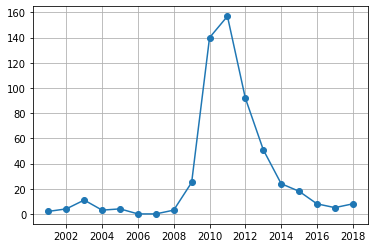

In [90]:
plt.plot(by_year, marker='o')
plt.grid()
plt.show()

In [94]:
# 분기별 파산한 은행 숫자
by_quarter = banks.resample(rule='Q').size()
by_quarter

Closing Date
2000-12-31    2
2001-03-31    1
2001-06-30    1
2001-09-30    2
2001-12-31    0
             ..
2016-12-31    0
2017-03-31    3
2017-06-30    3
2017-09-30    0
2017-12-31    2
Freq: Q-DEC, Length: 69, dtype: int64

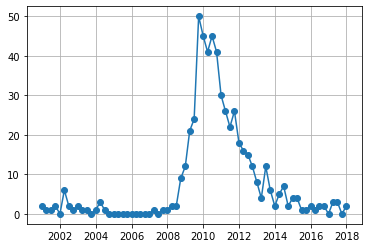

In [96]:
plt.plot(by_quarter, marker='o')
plt.grid()
plt.show()

In [97]:
by_month = banks.resample(rule='M').size()
by_month

Closing Date
2000-10-31    1
2000-11-30    0
2000-12-31    1
2001-01-31    0
2001-02-28    1
             ..
2017-08-31    0
2017-09-30    0
2017-10-31    1
2017-11-30    0
2017-12-31    1
Freq: M, Length: 207, dtype: int64

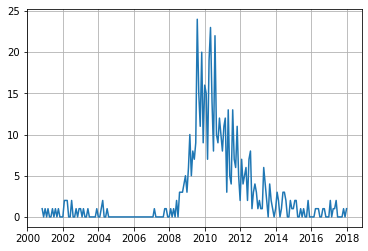

In [98]:
plt.plot(by_month)
plt.grid()
plt.show()

# datetime 속성 사용하기

## 대기 중 NO2 농도 측정 데이터

In [99]:
no2_file = 'https://github.com/pandas-dev/pandas/raw/master/doc/data/air_quality_no2_long.csv'

* csv 파일을 읽고 DataFrame을 생성
* datetime 타입으로 변환할 수 있는 컬럼을 변환

In [100]:
air_quality = pd.read_csv(no2_file)

In [101]:
air_quality.head()

,city,country,date.utc,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³


In [102]:
air_quality.info()  # date.utc 컬럼의 타입은 문자열

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2068 entries, 0 to 2067
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   city       2068 non-null   object 
 1   country    2068 non-null   object 
 2   date.utc   2068 non-null   object 
 3   location   2068 non-null   object 
 4   parameter  2068 non-null   object 
 5   value      2068 non-null   float64
 6   unit       2068 non-null   object 
dtypes: float64(1), object(6)
memory usage: 113.2+ KB


In [103]:
# date.utc 컬럼의 타입을 datetime 타입으로 변환
air_quality['date.utc'] = pd.to_datetime(air_quality['date.utc'])

In [104]:
air_quality.info()  #> date.utc 컬럼의 타입은 datetime64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2068 entries, 0 to 2067
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   city       2068 non-null   object             
 1   country    2068 non-null   object             
 2   date.utc   2068 non-null   datetime64[ns, UTC]
 3   location   2068 non-null   object             
 4   parameter  2068 non-null   object             
 5   value      2068 non-null   float64            
 6   unit       2068 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(1), object(5)
memory usage: 113.2+ KB


In [105]:
air_quality.head()

,city,country,date.utc,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³


In [106]:
air_quality.describe()  # datetime 타입의 컬럼은 평균, 최솟값, 최댓값 등을 요약하지 않음.

,value
count,2068.000000
mean,26.261847
std,13.479451
min,0.000000
25%,17.000000
50%,25.000000
75%,33.000000
max,97.000000


datetime64 타입의 컬럼에서도 min, max 메서드를 사용할 수 있음.

In [107]:
air_quality['date.utc'].min()

Timestamp('2019-05-07 01:00:00+0000', tz='UTC')

In [108]:
air_quality['date.utc'].max()

Timestamp('2019-06-21 00:00:00+0000', tz='UTC')

datetime64 타입의 컬럼에서 년/월/일/시/분/초/요일 등의 정보 추출 - dt 속성을 사용

In [109]:
air_quality['date.utc'].dt.year

0       2019
1       2019
2       2019
3       2019
4       2019
        ... 
2063    2019
2064    2019
2065    2019
2066    2019
2067    2019
Name: date.utc, Length: 2068, dtype: int64

In [112]:
air_quality['date.utc'].dt.month

0       6
1       6
2       6
3       6
4       6
       ..
2063    5
2064    5
2065    5
2066    5
2067    5
Name: date.utc, Length: 2068, dtype: int64

In [113]:
air_quality['date.utc'].dt.weekday  # datetime에서 요일 정보 추출
# 0(월요일), 1(화요일), ..., 5(토요일), 6(일요일)

0       4
1       3
2       3
3       3
4       3
       ..
2063    1
2064    1
2065    1
2066    1
2067    1
Name: date.utc, Length: 2068, dtype: int64

하루 중 언제 NO2의 농도가 가장 높을까?
* 시간대별 도시별 NO2의 평균 계산, 시각화

In [117]:
result = air_quality.groupby([air_quality['date.utc'].dt.hour, 'city'])['value'].mean()

In [119]:
result = result.reset_index()  # 모든 인덱스를 컬럼으로 변환(Seris -> DataFrame)

In [120]:
result

,date.utc,city,value
0,0,Antwerpen,24.750000
1,0,London,24.292683
2,0,Paris,31.683333
3,1,Antwerpen,25.838235
4,1,London,24.757576
...,...,...,...
67,22,London,28.969697
68,22,Paris,35.400000
69,23,Antwerpen,23.000000
70,23,London,28.414634


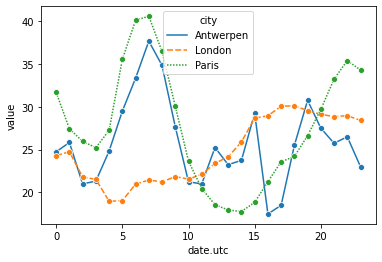

In [123]:
sns.lineplot(data=result, x='date.utc', y='value', hue='city', style='city', marker='o')
plt.show()

In [126]:
result = air_quality.pivot_table(values='value', index=air_quality['date.utc'].dt.hour, columns='city')

In [127]:
result

city,Antwerpen,London,Paris
date.utc,,,
0,24.750000,24.292683,31.683333
1,25.838235,24.757576,27.433333
2,21.000000,21.800000,25.964286
3,21.333333,21.536585,25.234211
4,24.833333,18.976190,27.257895
5,29.500000,19.048780,35.534211
6,33.333333,20.976190,40.102381
7,37.666667,21.452381,40.569767
8,34.833333,21.238095,36.458140


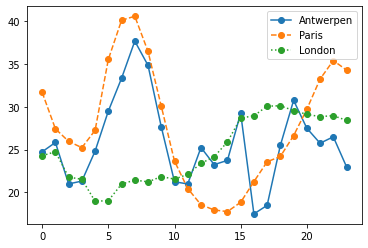

In [134]:
plt.plot(result['Antwerpen'], linestyle='-', marker='o', label='Antwerpen')
plt.plot(result['Paris'], linestyle='--', marker='o', label='Paris')
plt.plot(result['London'], linestyle=':', marker='o', label='London')
plt.legend()
plt.show()

일주일 중 어느 요일에 NO2 농도가 가장 높을까?
* 요일별 도시별 NO2 평균 계산, 시각화

In [144]:
result = air_quality.groupby([air_quality['date.utc'].dt.weekday, 'city'])['value'].mean()

In [145]:
result

date.utc  city     
0         Antwerpen    27.875000
          London       23.969697
          Paris        24.856250
1         Antwerpen    22.214286
          London       24.885714
          Paris        30.999359
2         Antwerpen    21.125000
          London       23.460432
          Paris        29.165753
3         Antwerpen    27.500000
          London       24.780142
          Paris        28.600690
4         Antwerpen    28.400000
          London       26.446809
          Paris        31.617986
5         Antwerpen    33.500000
          London       24.977612
          Paris        25.266154
6         Antwerpen    21.896552
          London       24.859155
          Paris        23.274306
Name: value, dtype: float64

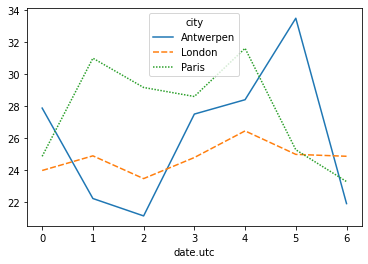

In [147]:
sns.lineplot(data=result, x='date.utc', y=result.values, hue='city', style='city')
plt.show()

In [148]:
# reset_index를 사용해서 인덱스들을 컬럼으로 변환 -> DataFrame
result = result.reset_index()

In [149]:
result

,date.utc,city,value
0,0,Antwerpen,27.875000
1,0,London,23.969697
2,0,Paris,24.856250
3,1,Antwerpen,22.214286
4,1,London,24.885714
5,1,Paris,30.999359
6,2,Antwerpen,21.125000
7,2,London,23.460432
8,2,Paris,29.165753
9,3,Antwerpen,27.500000


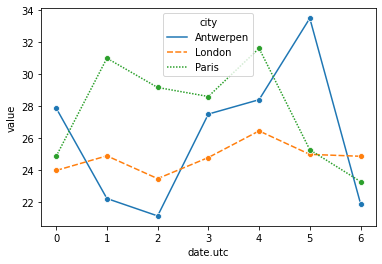

In [150]:
sns.lineplot(data=result, x='date.utc', y='value', hue='city', style='city', marker='o')
plt.show()

In [151]:
result = air_quality.pivot_table(values='value', 
                                 index=air_quality['date.utc'].dt.weekday,
                                 columns='city')

In [152]:
result

city,Antwerpen,London,Paris
date.utc,,,
0,27.875000,23.969697,24.856250
1,22.214286,24.885714,30.999359
2,21.125000,23.460432,29.165753
3,27.500000,24.780142,28.600690
4,28.400000,26.446809,31.617986
5,33.500000,24.977612,25.266154
6,21.896552,24.859155,23.274306


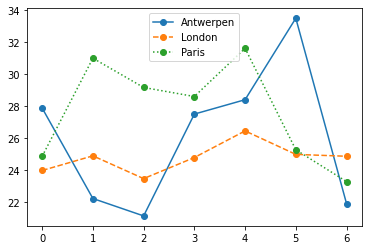

In [155]:
plt.plot(result['Antwerpen'], 'o-', label='Antwerpen')
plt.plot(result['London'], 'o--', label='London')
plt.plot(result['Paris'], 'o:', label='Paris')

plt.legend()
plt.show()

# DatetimeIndex를 사용한 slicing

In [157]:
air_quality.head()

,city,country,date.utc,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³


In [158]:
# 'date.utc' 컬럼을 인덱스로 변환
air_quality = air_quality.set_index('date.utc')

In [159]:
air_quality.head()

,city,country,location,parameter,value,unit
date.utc,,,,,,
2019-06-21 00:00:00+00:00,Paris,FR,FR04014,no2,20.0,µg/m³
2019-06-20 23:00:00+00:00,Paris,FR,FR04014,no2,21.8,µg/m³
2019-06-20 22:00:00+00:00,Paris,FR,FR04014,no2,26.5,µg/m³
2019-06-20 21:00:00+00:00,Paris,FR,FR04014,no2,24.9,µg/m³
2019-06-20 20:00:00+00:00,Paris,FR,FR04014,no2,21.4,µg/m³


In [160]:
air_quality.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2068 entries, 2019-06-21 00:00:00+00:00 to 2019-05-07 01:00:00+00:00
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   city       2068 non-null   object 
 1   country    2068 non-null   object 
 2   location   2068 non-null   object 
 3   parameter  2068 non-null   object 
 4   value      2068 non-null   float64
 5   unit       2068 non-null   object 
dtypes: float64(1), object(5)
memory usage: 113.1+ KB


In [166]:
# 2019-06-01 데이터 추출
air_quality.loc['2019-06-01']

,city,country,location,parameter,value,unit
date.utc,,,,,,
2019-06-01 23:00:00+00:00,Paris,FR,FR04014,no2,32.7,µg/m³
2019-06-01 22:00:00+00:00,Paris,FR,FR04014,no2,48.1,µg/m³
2019-06-01 21:00:00+00:00,Paris,FR,FR04014,no2,49.4,µg/m³
2019-06-01 20:00:00+00:00,Paris,FR,FR04014,no2,43.6,µg/m³
2019-06-01 19:00:00+00:00,Paris,FR,FR04014,no2,24.6,µg/m³
2019-06-01 18:00:00+00:00,Paris,FR,FR04014,no2,14.5,µg/m³
2019-06-01 17:00:00+00:00,Paris,FR,FR04014,no2,11.8,µg/m³
2019-06-01 16:00:00+00:00,Paris,FR,FR04014,no2,11.8,µg/m³
2019-06-01 15:00:00+00:00,Paris,FR,FR04014,no2,10.2,µg/m³


In [167]:
# 2019-06-15 ~ 2019-06-16 데이터
air_quality.loc['2019-06-15':'2019-06-16']

,city,country,location,parameter,value,unit
date.utc,,,,,,
2019-06-16 23:00:00+00:00,Paris,FR,FR04014,no2,67.3,µg/m³
2019-06-16 22:00:00+00:00,Paris,FR,FR04014,no2,56.6,µg/m³
2019-06-16 21:00:00+00:00,Paris,FR,FR04014,no2,42.7,µg/m³
2019-06-16 20:00:00+00:00,Paris,FR,FR04014,no2,23.3,µg/m³
2019-06-16 19:00:00+00:00,Paris,FR,FR04014,no2,14.4,µg/m³
...,...,...,...,...,...,...
2019-06-15 07:00:00+00:00,London,GB,London Westminster,no2,13.0,µg/m³
2019-06-15 06:00:00+00:00,London,GB,London Westminster,no2,13.0,µg/m³
2019-06-15 05:00:00+00:00,London,GB,London Westminster,no2,10.0,µg/m³


In [168]:
# 2019-05 데이터 추출
air_quality.loc['2019-05']

,city,country,location,parameter,value,unit
date.utc,,,,,,
2019-05-31 23:00:00+00:00,Paris,FR,FR04014,no2,81.7,µg/m³
2019-05-31 22:00:00+00:00,Paris,FR,FR04014,no2,68.0,µg/m³
2019-05-31 21:00:00+00:00,Paris,FR,FR04014,no2,60.2,µg/m³
2019-05-31 20:00:00+00:00,Paris,FR,FR04014,no2,37.0,µg/m³
2019-05-31 19:00:00+00:00,Paris,FR,FR04014,no2,23.3,µg/m³
...,...,...,...,...,...,...
2019-05-07 06:00:00+00:00,London,GB,London Westminster,no2,26.0,µg/m³
2019-05-07 04:00:00+00:00,London,GB,London Westminster,no2,16.0,µg/m³
2019-05-07 03:00:00+00:00,London,GB,London Westminster,no2,19.0,µg/m³


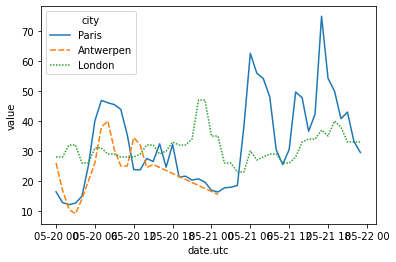

In [173]:
# 2019-05-20 0시 ~ 2019-05-21 23시 NO2 농도 변화를 도시별로 line plot
subset = air_quality.loc['2019-05-20':'2019-05-21']

sns.lineplot(data=subset, x='date.utc', y='value', hue='city', style='city')
plt.show()